# Bike Sharing System Model for BoomBikes
- Linear Regression Method to find which variables are significant in predicting the demand for shared bikes.
- Perform test prediction and find how well those variables describe the bike demands

In [1]:
# Suppress Warning
import warnings
warnings.filterwarnings('ignore')

# Import Required Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from math import sqrt


## Step-1 : Data Analysis

In [2]:
# Read Data from csv
bikes = pd.read_csv("day.csv")
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [3]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikes.shape

(730, 16)

In [5]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# checking for the null values in column data
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### There is no null values or data with empty values.

In [7]:
# renaming few columns for better readibility
bikes.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [8]:
# Copy the bikes data to new data frome for further processing
bikes_copy = bikes.copy()
bikes_copy

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [9]:
bikes_copy.shape

(730, 16)

In [10]:
# dropping the duplicates
bikes_copy.drop_duplicates(inplace=True)
bikes_copy.shape

(730, 16)

## Step-2 : Data Cleaning

In [11]:
bikes.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
# dropping the unwanted columns
# instant has only index for the row, 
# dteday has date which also similar to month and year 
# casual and registered seems to be the breakup by category for cnt column.

bikes.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bikes.shape

(730, 12)

In [13]:
bikes.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [14]:
# Copy the Bikes to new Data to check the Corr in future as we will encode few columns for readability
bikes_for_corr = bikes.copy()
bikes_for_corr

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [15]:
# Encode/Map Season, month, weekday, weathersit column to Readable format

bikes.season = bikes.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikes.month = bikes.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bikes.weekday = bikes.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bikes.weathersit = bikes.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [16]:
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
# Check the Dataframe info

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [18]:
bikes.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Step-3 : Data Visualization

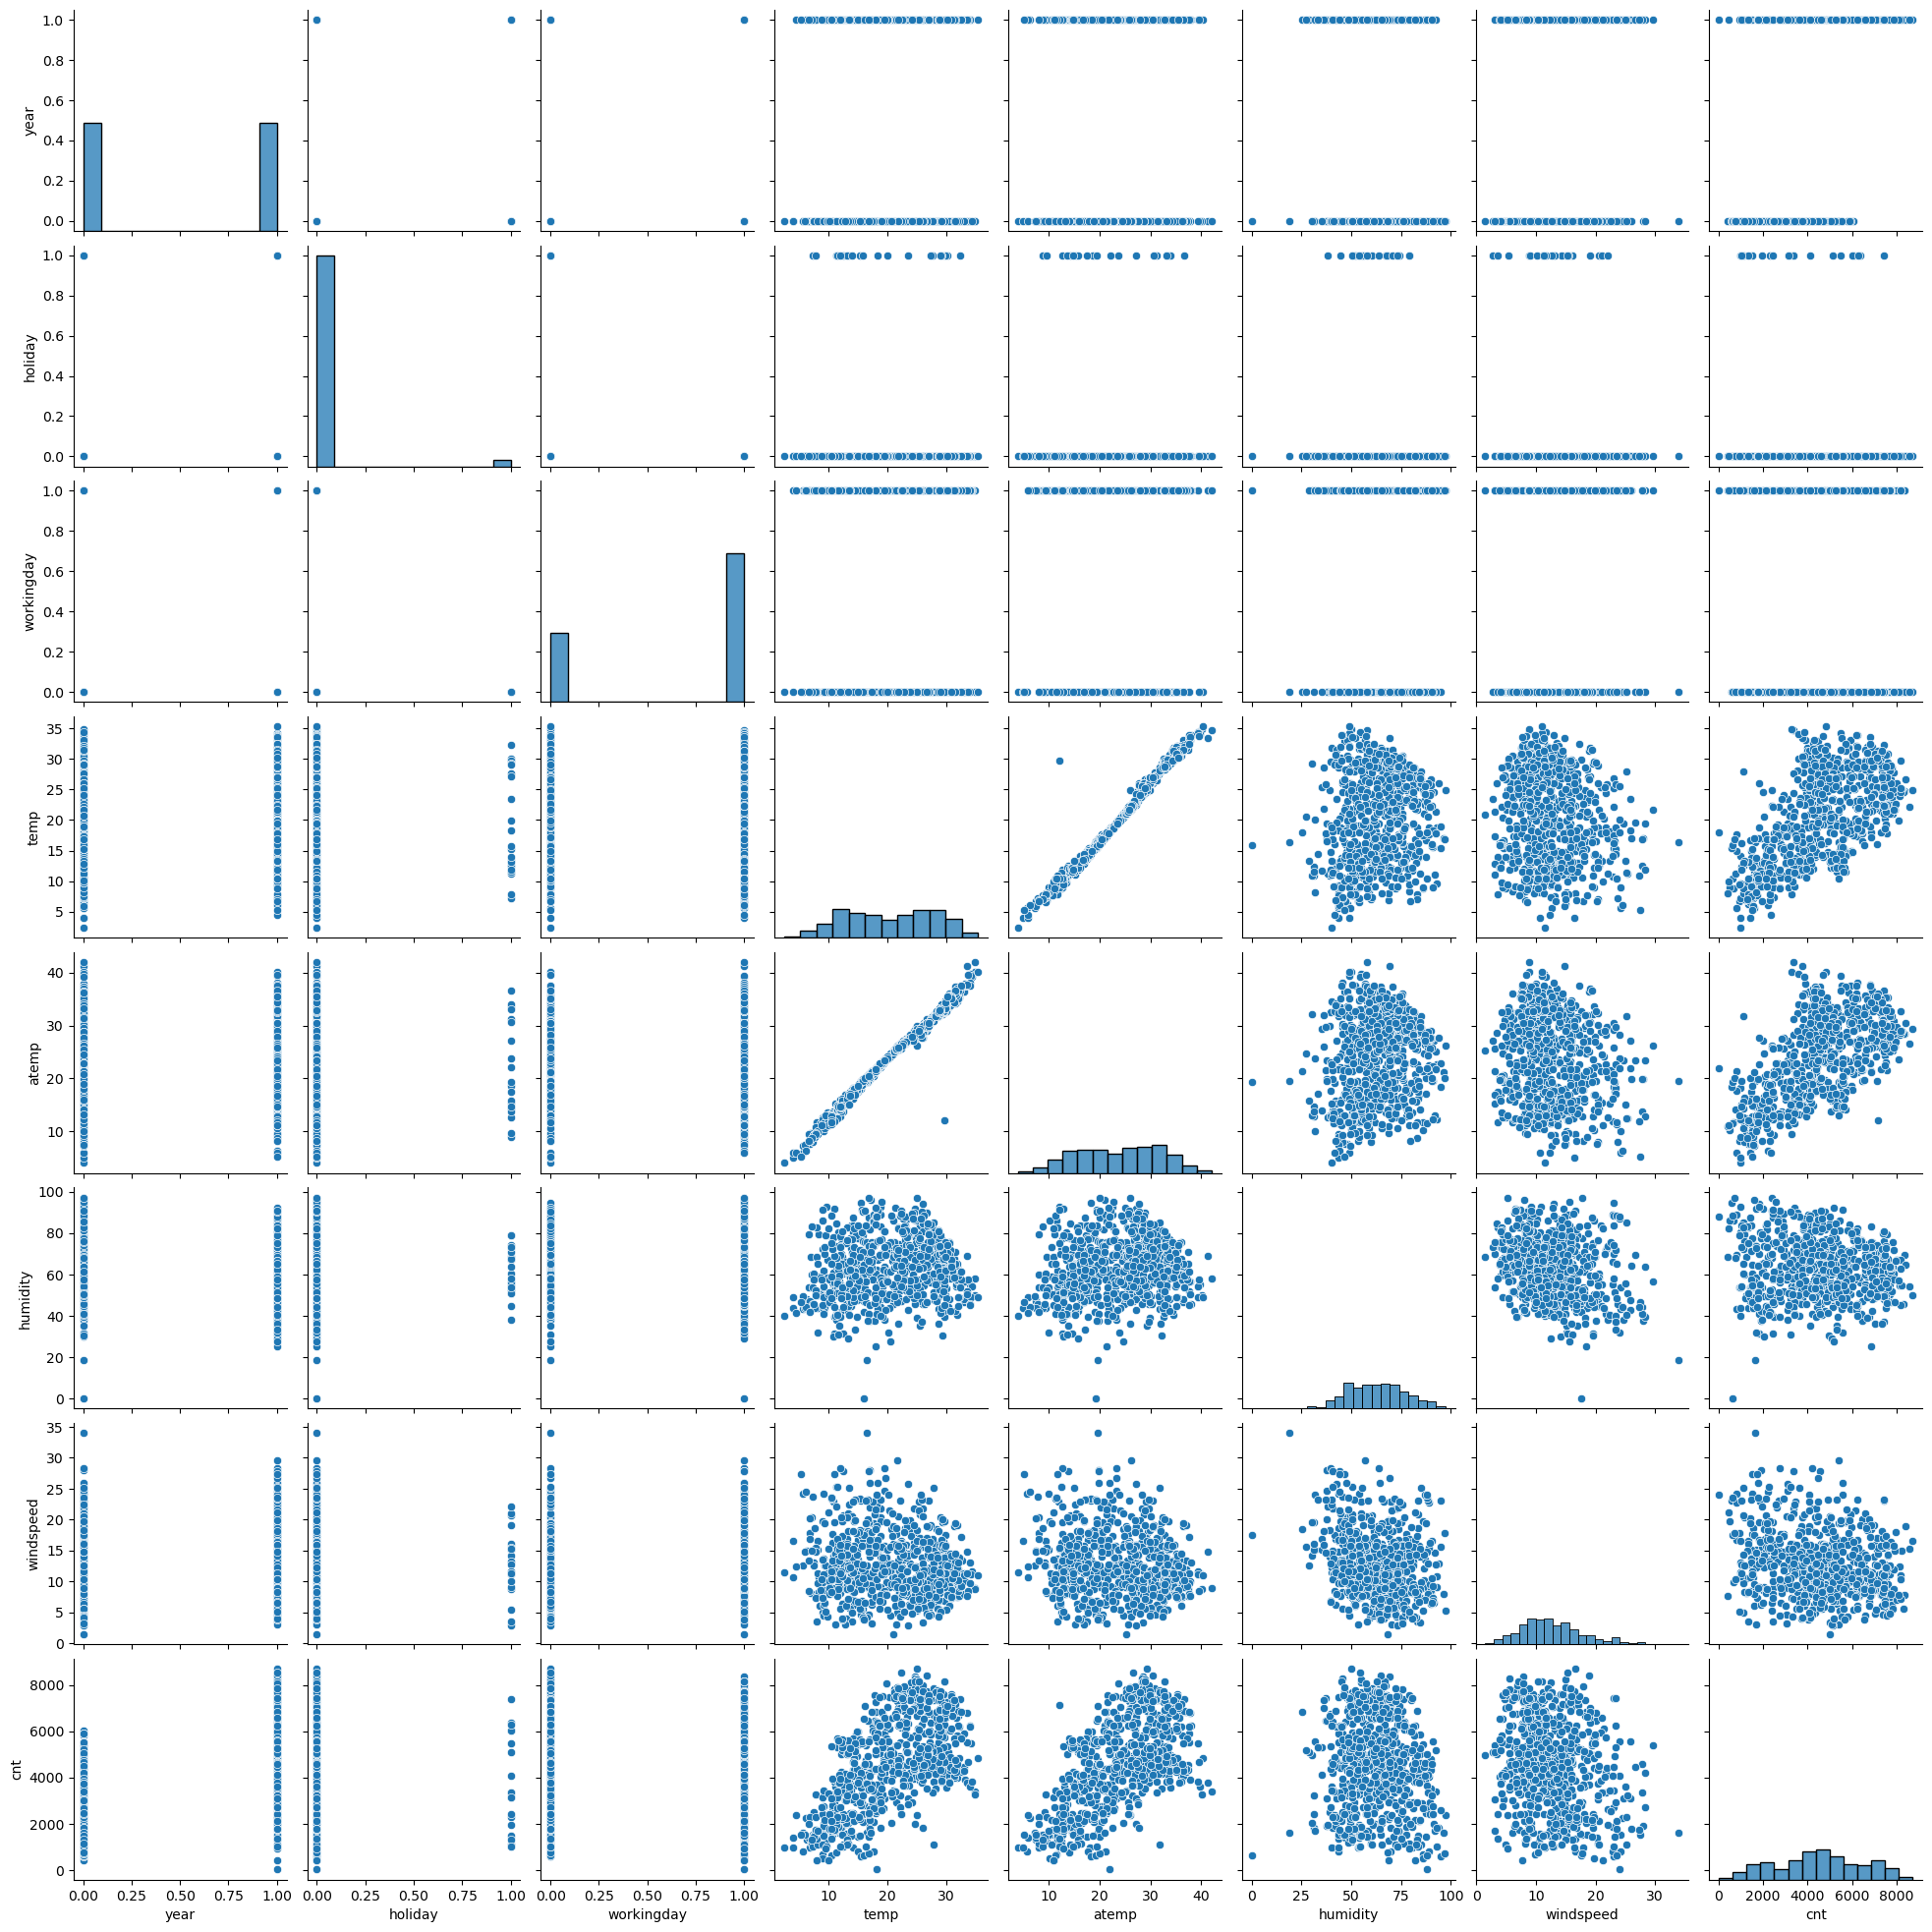

In [19]:
# Analysing/visualizing the Numerical columns
sns.pairplot(bikes)
plt.show()

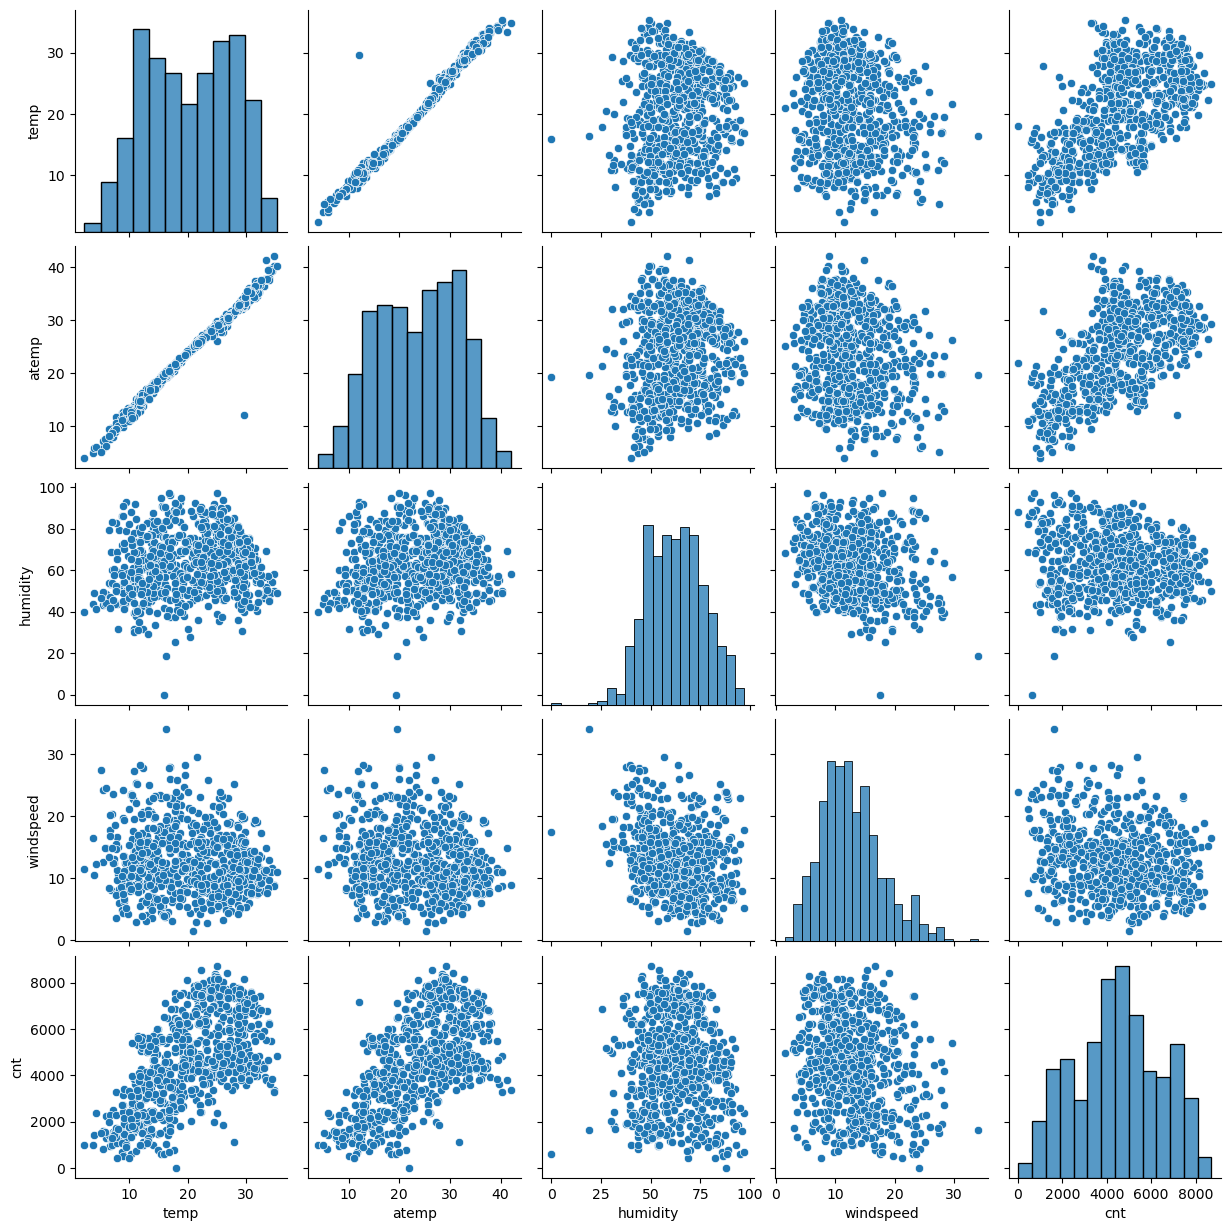

In [20]:
# visualize numerical variables with fewer relevant columns
columns = ["temp", "atemp", "humidity", "windspeed", "cnt"]
sns.pairplot(data=bikes, vars= columns)
plt.show()

#### Observation :
1. temp has linear regression with cnt
2. atemp has linear regression with cnt

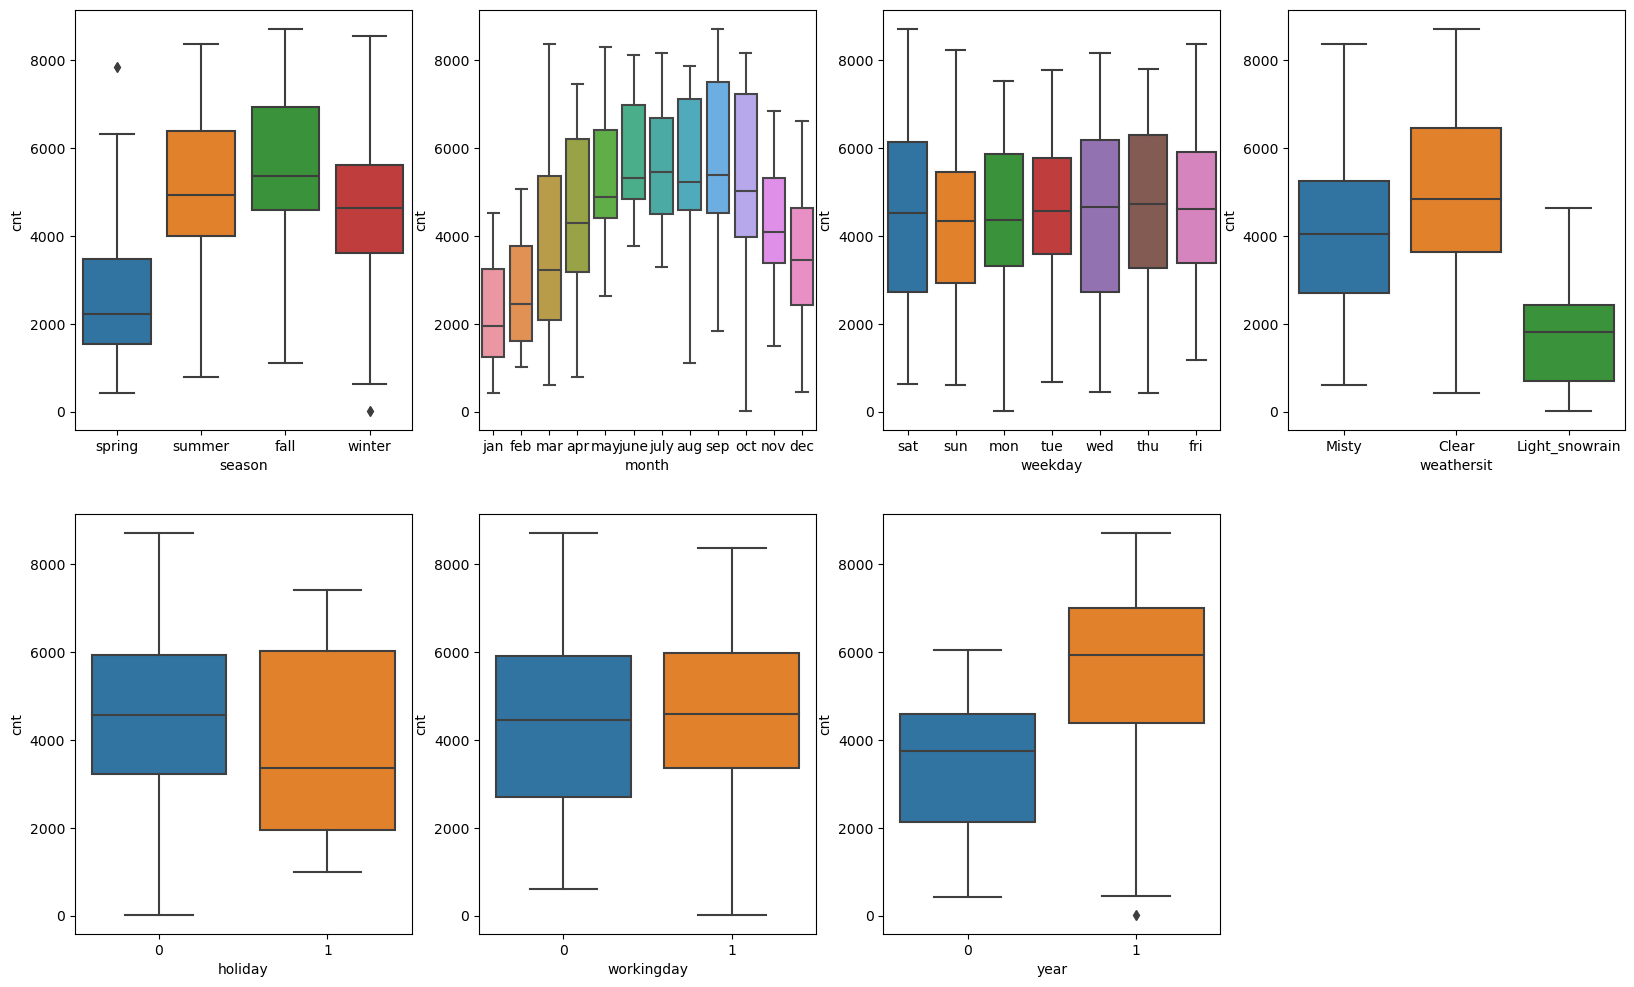

In [21]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = bikes)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = bikes)
plt.show()

#### Observation:
1. Demand for Bikes is more in fall season
2. Clear Weather attacts more Bikes
3. Bike Demands increased in year 2019

In [22]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column, y="cnt", data=bikes)
    plt.subplot(1,2,2)
    sns.barplot(x=column, y="cnt", data=bikes , hue="year")
    ax = plt.gca()
    # Create custom legend with different colors
    legend_labels = ['2018', '2019']
    colors = ['blue', 'orange']
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, colors)]
    # Add legend with custom handles
    ax.legend(handles=legend_handles, title="Year", loc='upper right')
    #plt.legend(labels=['2018', '2019'])
    plt.show()

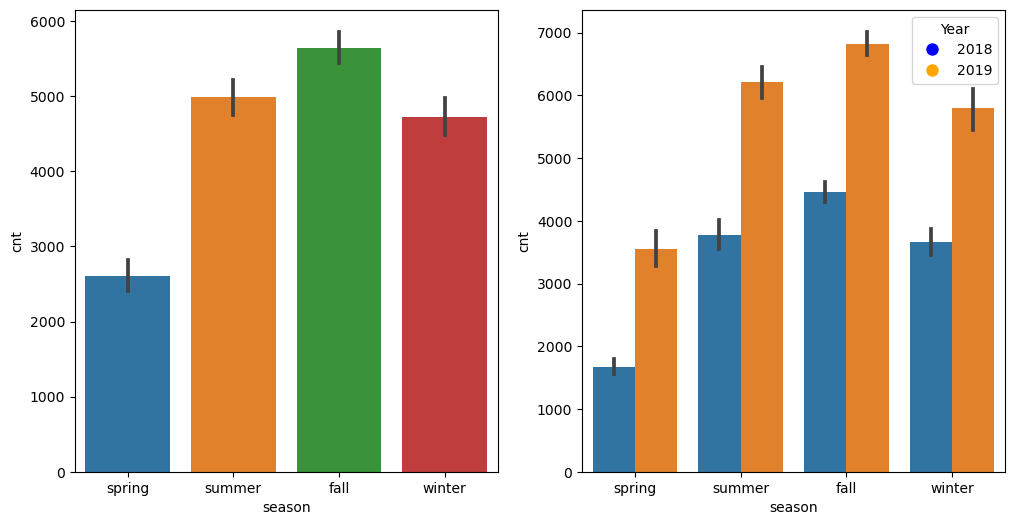

In [23]:
# plotting visualization for season column
plot_cat_columns('season')

1. Fall season seems to have attracted more booking.
2. In each season the booking count has increased drastically from 2018 to 2019.

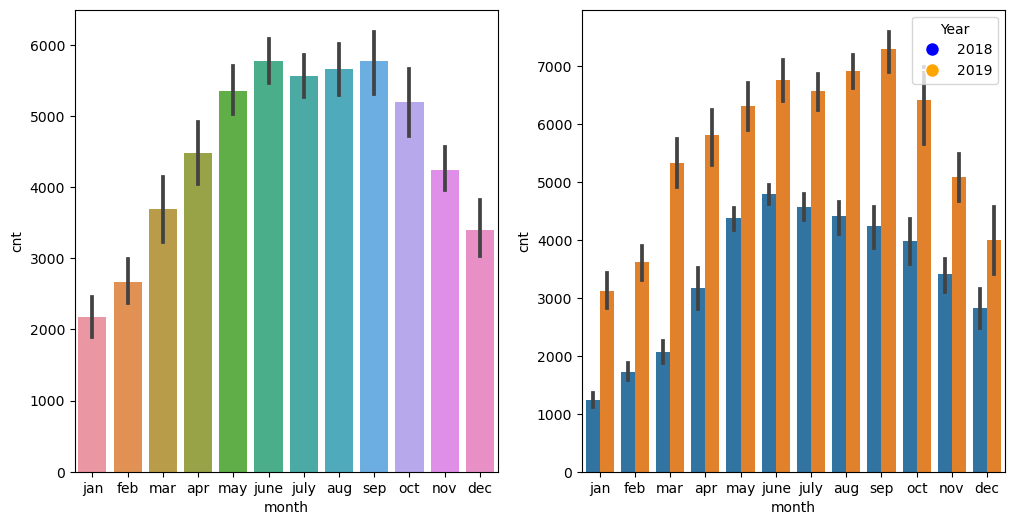

In [24]:
# plotting visualization for month column
plot_cat_columns('month')

1. Major booking are done for month duration May To Oct
2. Booking Trend increase from Start of the Year till Mid of the Year and then decline towards the End of the Year
3. Booking demand is more in 2019 than 2018 for each months

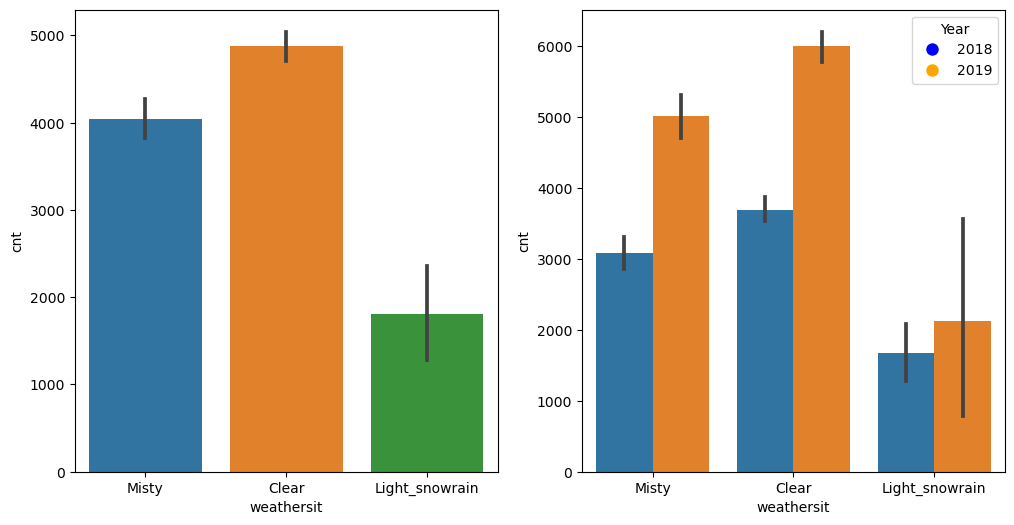

In [25]:
# plotting visualization for weathersit column
plot_cat_columns('weathersit')

1. Clear weather attracted more bookings. 
2. Booking increased for each weather situation in 2019 than 2018.

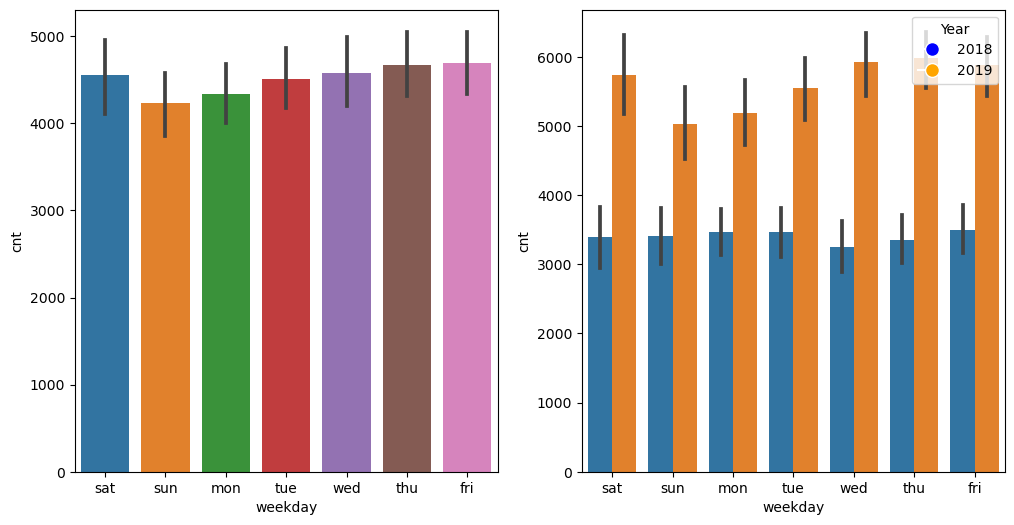

In [26]:
# plotting visualization for weekday column
plot_cat_columns('weekday')

1. No major difference in weekdays bike booking

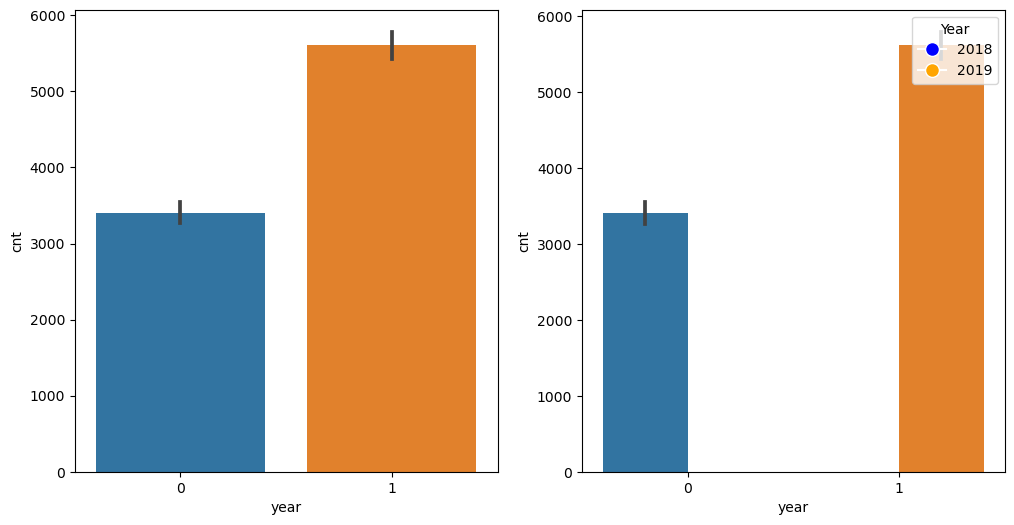

In [27]:
# plotting visualization for year column
plot_cat_columns('year')

1. Year 2019 attracted more booking than Year 2018

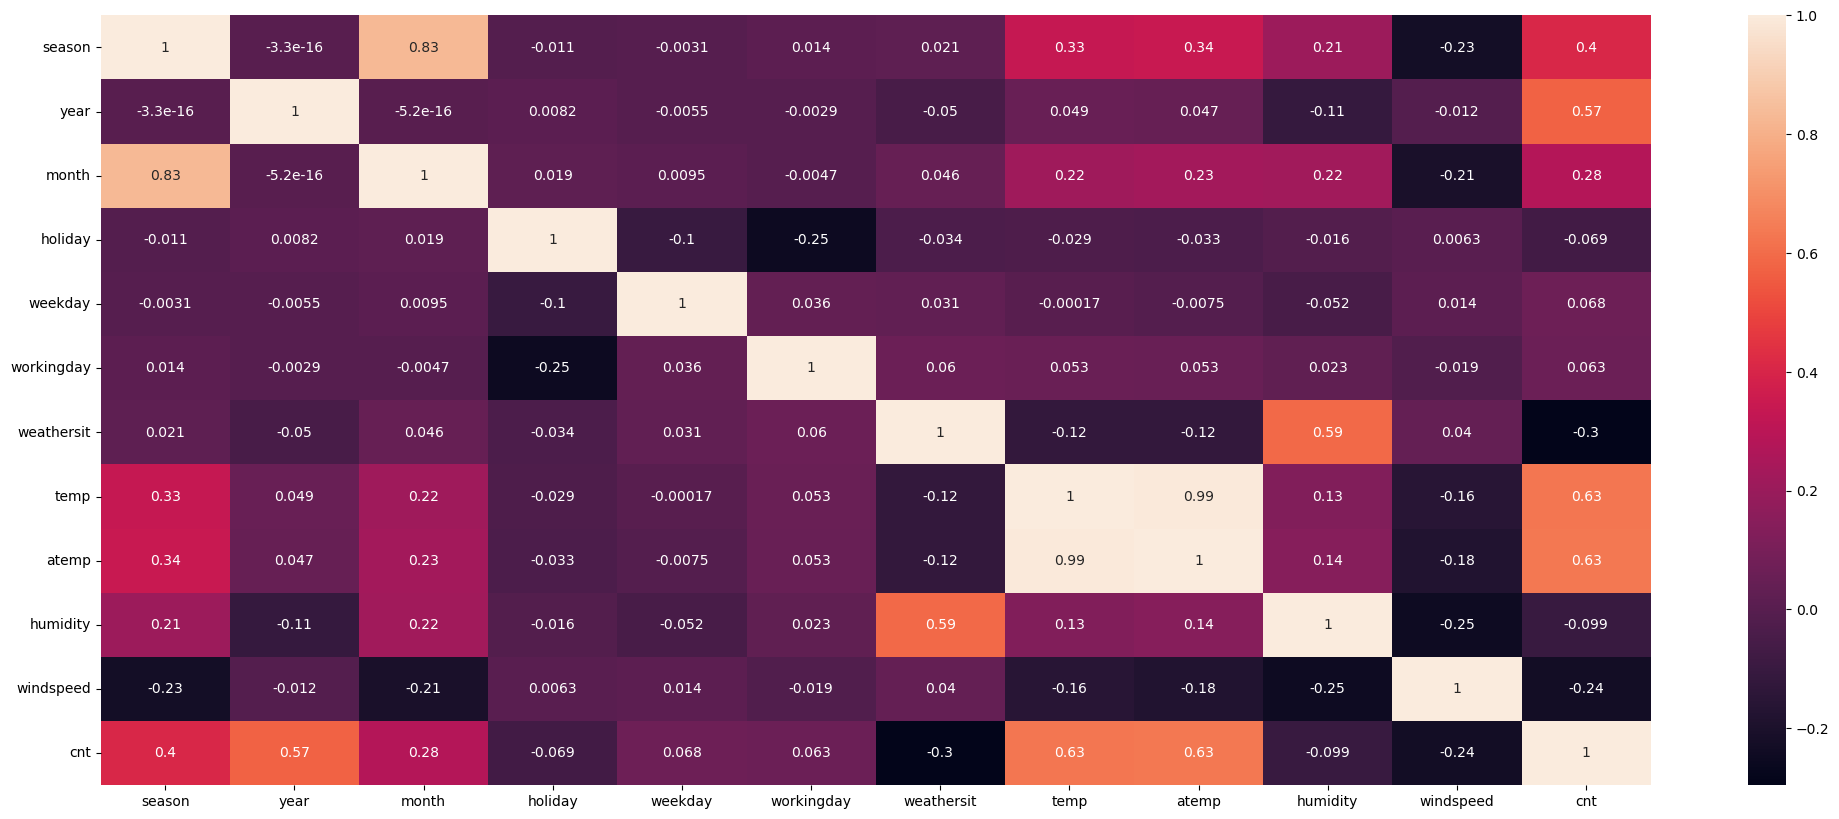

In [28]:
#see the correlation from the bikes_for_corr which is copy of bikes without encoding
plt.figure(figsize = (25,10))
sns.heatmap(bikes_for_corr.corr(),annot = True)
plt.show()

1. We observe multicolinearity in the data. 
2. Though we saw earlier that there is linear regression of cnt with atemp and temp , we can't decide on those params because of multicolinearity.
3. We will keep pur decision/predictions based on VIF and p-value for each variable

## Step-4: Data Preparation

In [29]:
# Dummy variable creation for month, weekday, weathersit and season variables.
months_df=pd.get_dummies(bikes.month,drop_first=True).astype(int)
weekdays_df=pd.get_dummies(bikes.weekday,drop_first=True).astype(int)
weathersit_df=pd.get_dummies(bikes.weathersit,drop_first=True).astype(int)
seasons_df=pd.get_dummies(bikes.season,drop_first=True).astype(int)

In [30]:
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [31]:
# Merging  the dataframe, with the dummy variable dataset. 
bikes_new = pd.concat([bikes,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [32]:
bikes_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [33]:
bikes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    int32  
 13  dec             730 non-null    int32  
 14  feb             730 non-null    int32  
 15  jan             730 non-null    int32  
 16  july            730 non-null    int32  
 17  june            730 non-null    int

In [34]:
# dropping unnecessary columns as we have already created dummy variable out of it.

bikes_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bikes_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [35]:
bikes_new.shape

(730, 30)

In [36]:
bikes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    int32  
 9   dec             730 non-null    int32  
 10  feb             730 non-null    int32  
 11  jan             730 non-null    int32  
 12  july            730 non-null    int32  
 13  june            730 non-null    int32  
 14  mar             730 non-null    int32  
 15  may             730 non-null    int32  
 16  nov             730 non-null    int32  
 17  oct             730 non-null    int

## Step-5: Prepare Train and Test Data Sets

In [37]:
# splitting the dataframe into Train and Test
np.random.seed(0)
bikes_train, bikes_test = train_test_split(bikes_new, train_size = 0.7, random_state = 100)

In [38]:
bikes_train.shape

(510, 30)

In [39]:
bikes_test.shape

(220, 30)

In [40]:
bikes_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [41]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

#Create list of numeric variables except yes-no and dummy vars
num_vars = ['temp','atemp','humidity','windspeed','cnt']

# Fit on data 
bikes_train[num_vars] = scaler.fit_transform(bikes_train[num_vars])

bikes_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [42]:
bikes_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


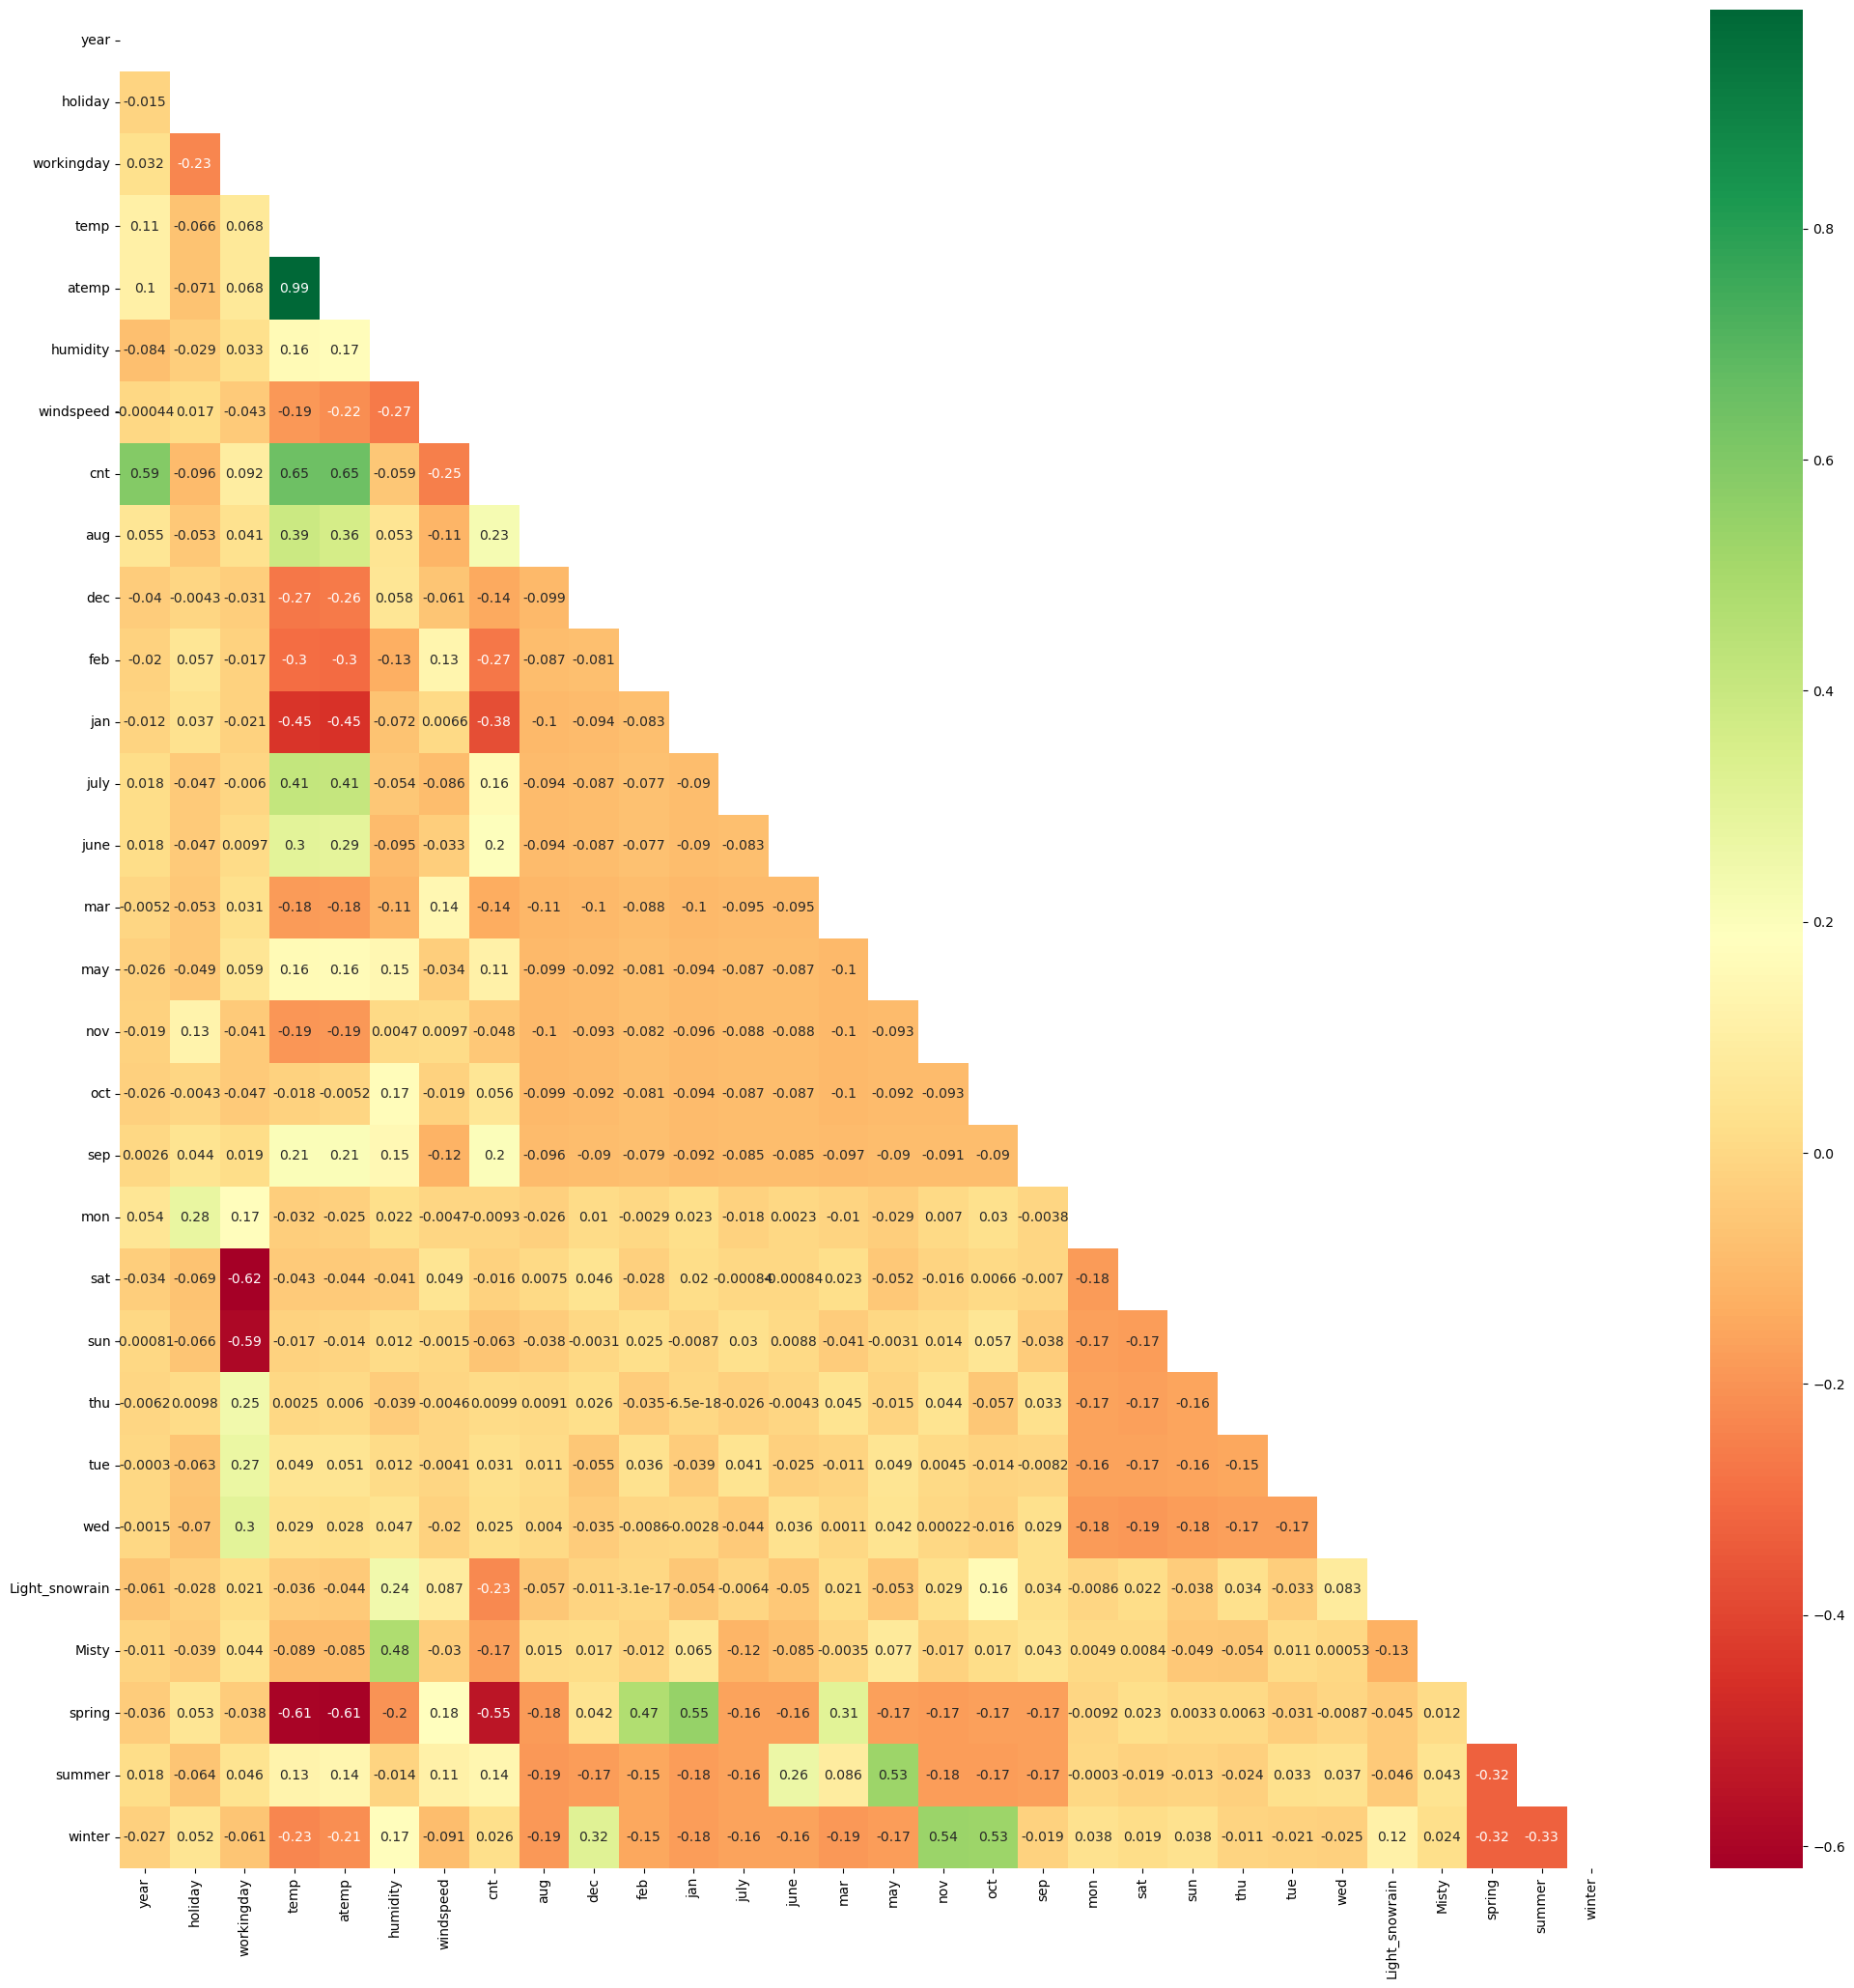

In [43]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(bikes_train.corr())
sns.heatmap(bikes_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

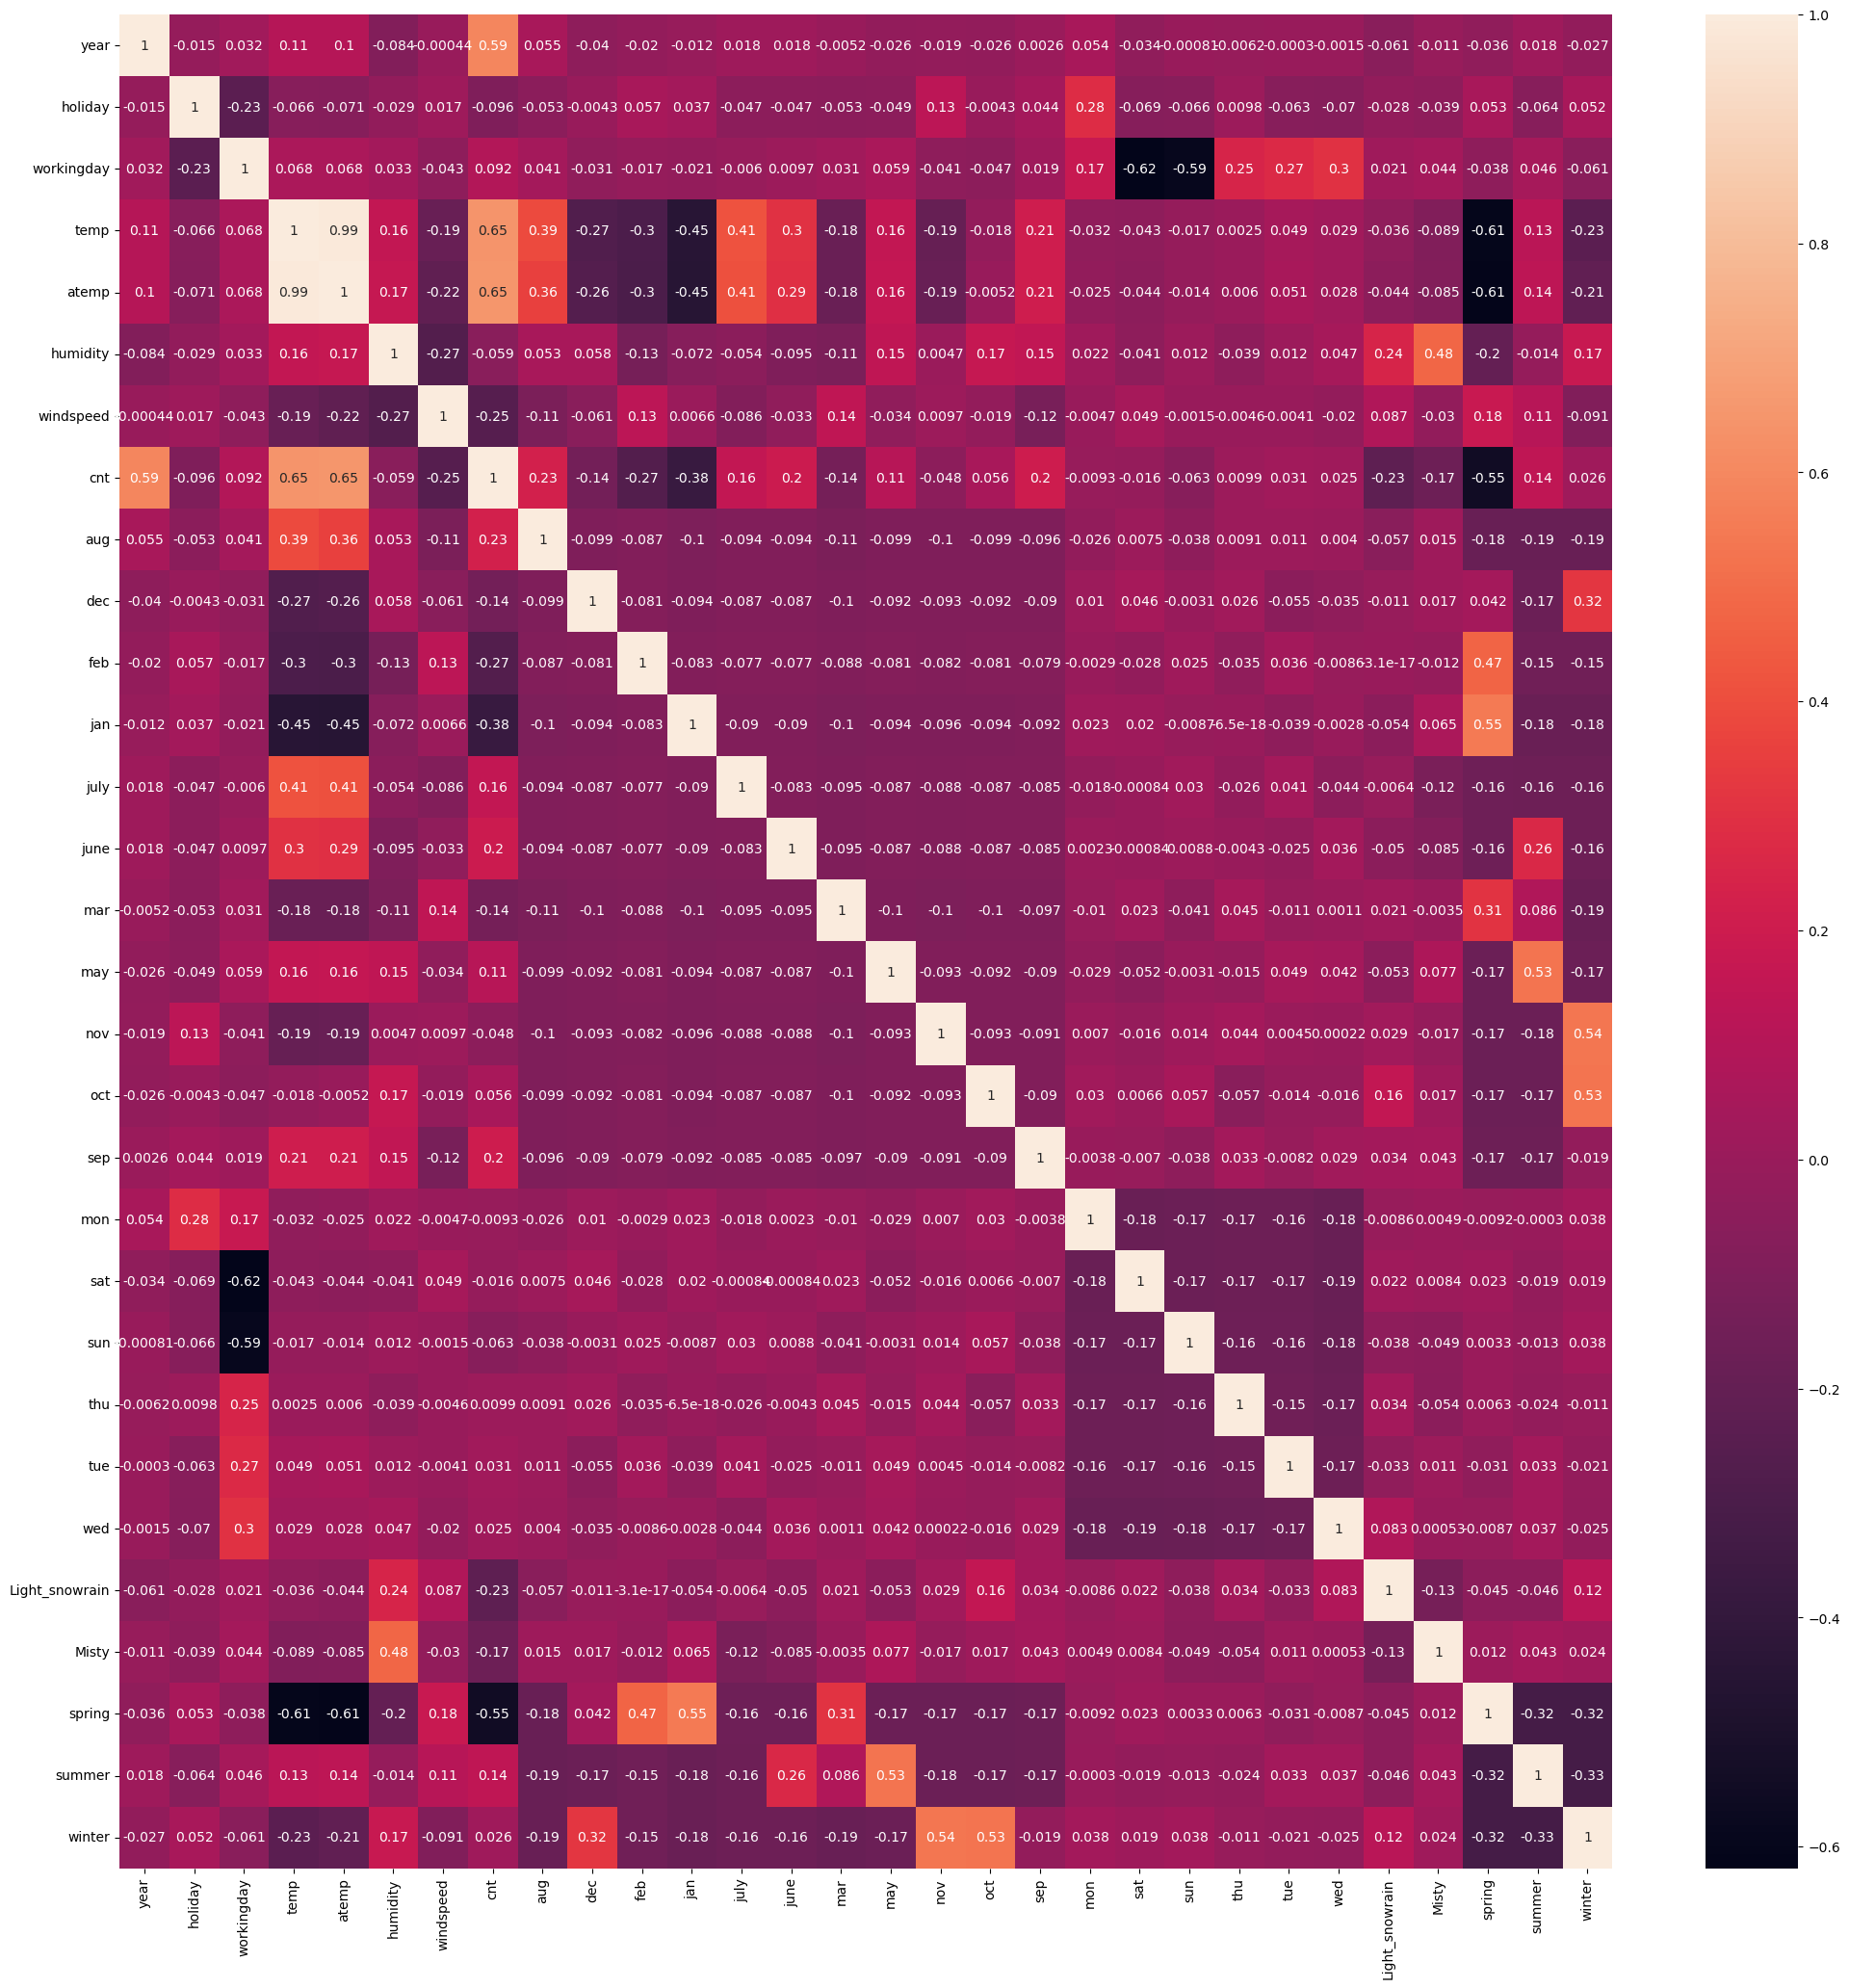

In [44]:
#heatmap
plt.figure(figsize = (25, 25))
sns.heatmap(bikes_train.corr(), annot = True)
plt.show()

In [45]:
print(bikes_train.corr().cnt.sort_values)

<bound method Series.sort_values of year              0.591433
holiday          -0.095948
workingday        0.092019
temp              0.645048
atemp             0.647944
humidity         -0.058793
windspeed        -0.253038
cnt               1.000000
aug               0.227578
dec              -0.143546
feb              -0.270351
jan              -0.378296
july              0.158087
june              0.195411
mar              -0.137465
may               0.113276
nov              -0.048002
oct               0.055558
sep               0.201639
mon              -0.009333
sat              -0.015998
sun              -0.063214
thu               0.009928
tue               0.030528
wed               0.025468
Light_snowrain   -0.226678
Misty            -0.169715
spring           -0.548987
summer            0.140259
winter            0.025945
Name: cnt, dtype: float64>


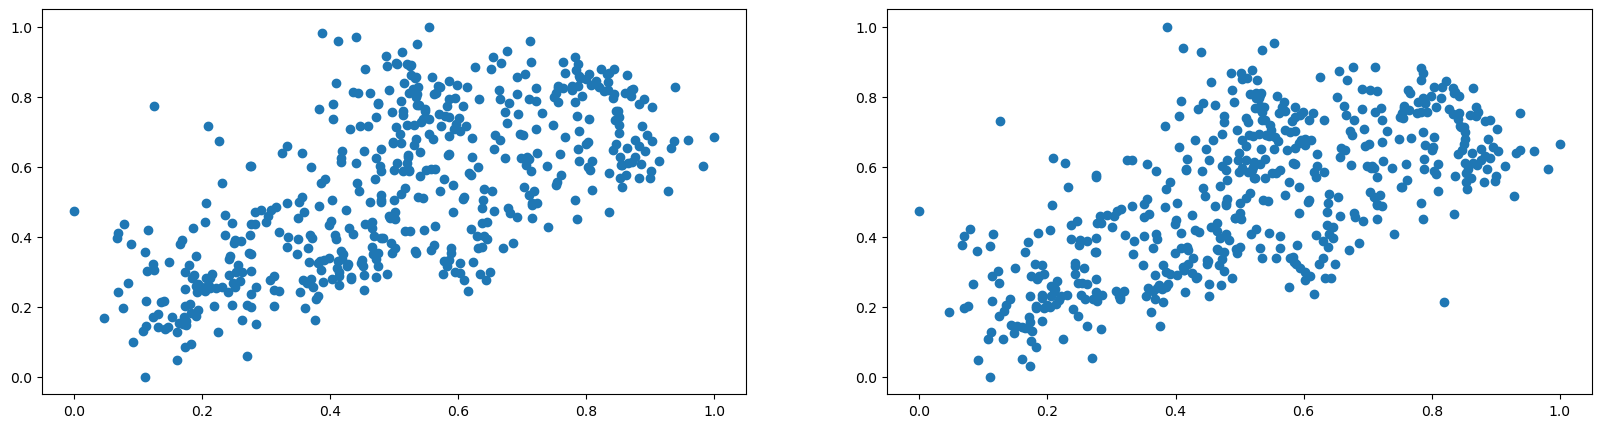

In [46]:
# Visualizing temp , atemp correlation to see the trends via Scatter plot.
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(bikes_train['cnt'], bikes_train['temp'])
plt.subplot(1,2,2)
plt.scatter(bikes_train['cnt'], bikes_train['atemp'])
plt.show()

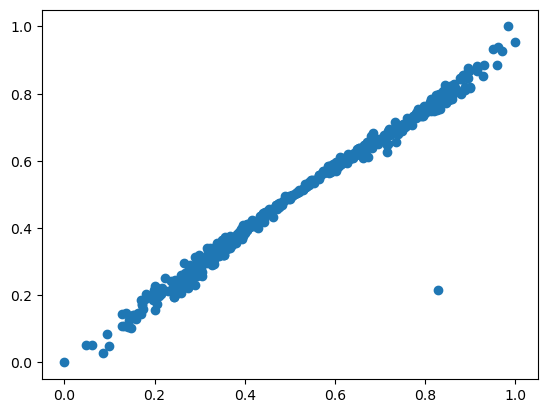

In [47]:
#Let's see the relation between temp, atemp
plt.scatter(bikes_train['temp'], bikes_train['atemp'])
plt.show()

There's linear relation between temp and atemp, so we might have to consider only one among both to avoid multi-collinearity

In [48]:
# Split X_train and y_train

y_train = bikes_train.pop("cnt")
X_train = bikes_train

In [49]:
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [50]:
X_train

,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.824359,0.679690,0.187140,1,0,0,...,0,0,1,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0,0,1,...,0,0,0,0,1,0,0,1,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0,1,0,...,1,0,0,0,0,0,1,0,0,1
79,0,0,1,0.462664,0.434043,0.759870,0.529881,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [51]:
X_train.shape

(510, 29)

In [52]:
# Initializing and fitting a Linear Regression model (lm) to the training data (X_train, y_train),
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [53]:
# Using Recursive Feature Elimination (RFE) with lm as the estimator to select 15 best features from X_train.
rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [54]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 12),
 ('dec', False, 3),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 11),
 ('may', False, 6),
 ('nov', False, 4),
 ('oct', False, 9),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 10),
 ('tue', False, 7),
 ('wed', False, 13),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 15),
 ('winter', True, 1)]

In [55]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'july', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty',
       'spring', 'winter'],
      dtype='object')

In [56]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'thu', 'tue', 'wed', 'summer'],
      dtype='object')

#### RFE Details :
[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 12),
 ('dec', False, 3),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 11),
 ('may', False, 6),
 ('nov', False, 4),
 ('oct', False, 9),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 10),
 ('tue', False, 7),
 ('wed', False, 13),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 15),
 ('winter', True, 1)]

#### RFE Selected Feature :
['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'july', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty',
       'spring', 'winter']
       
#### RFE Rejected Feature:
['aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'thu', 'tue', 'wed', 'summer']

In [57]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe

,year,holiday,workingday,temp,atemp,humidity,windspeed,july,sep,sat,sun,Light_snowrain,Misty,spring,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,1,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,1,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,1,0,0,1,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0,0,0,0,0,0,1,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0,0,1,0,0,1,0,1
79,0,0,1,0.462664,0.434043,0.759870,0.529881,0,0,0,0,0,1,0,0


In [58]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [59]:
calculateVIF(X_train_rfe)

,Features,VIF
3,temp,52.82
4,atemp,51.48
2,workingday,40.81
9,sat,9.96
10,sun,9.67
13,spring,2.55
1,holiday,2.54
5,humidity,1.90
14,winter,1.79
12,Misty,1.57


temp and atemp shows high VIF Value

## Step-6: Start Model Building

### Model-1

In [60]:
# As we already seen that atemp and temp has linear relation. We can only consider temp and drop atemp

In [61]:
X_train_new = X_train_rfe.drop('atemp', axis=1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,workingday,40.65
8,sat,9.92
9,sun,9.64
3,temp,2.99
12,spring,2.55
1,holiday,2.54
4,humidity,1.89
13,winter,1.78
11,Misty,1.57
6,july,1.30


In [62]:
# Building 1st linear regression model
X_train_lm_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          9.38e-190
Time:                        17:52:08   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2435      0.025      9.

workingday has high p-value and low VIF.
it should be dropped

### Model-2

In [63]:
X_train_new = X_train_new.drop('workingday', axis=1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,22.65
2,temp,15.31
4,windspeed,4.06
11,spring,2.55
10,Misty,2.25
12,winter,2.10
0,year,2.06
5,july,1.40
7,sat,1.23
8,sun,1.23


humidity has high VIF

In [64]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          9.38e-190
Time:                        17:52:08   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3383      0.031     10.

### Model-3

In [65]:
X_train_new = X_train_new.drop('humidity', axis=1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.73
3,windspeed,4.04
0,year,2.06
10,spring,1.68
9,Misty,1.52
11,winter,1.43
4,july,1.35
6,sat,1.23
7,sun,1.21
5,sep,1.20


In [66]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          1.26e-187
Time:                        17:52:08   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2587      0.024     10.

VIF Looks good now. But 'sat' has .318 p-value.
can be dropped as well.

### Model-4

In [67]:
X_train_new = X_train_new.drop('sat', axis=1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.67
3,windspeed,4.01
0,year,2.06
9,spring,1.66
8,Misty,1.52
10,winter,1.41
4,july,1.35
5,sep,1.20
6,sun,1.18
7,Light_snowrain,1.08


In [68]:
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          1.32e-188
Time:                        17:52:08   Log-Likelihood:                 502.54
No. Observations:                 510   AIC:                            -981.1
Df Residuals:                     498   BIC:                            -930.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2608      0.024     11.

### VIF and P-values looks good now.

## Step-7: Model Validation

In [69]:
y_train_pred = lr_4.predict(X_train_lm_4)

Text(0.5, 0, 'Errors')

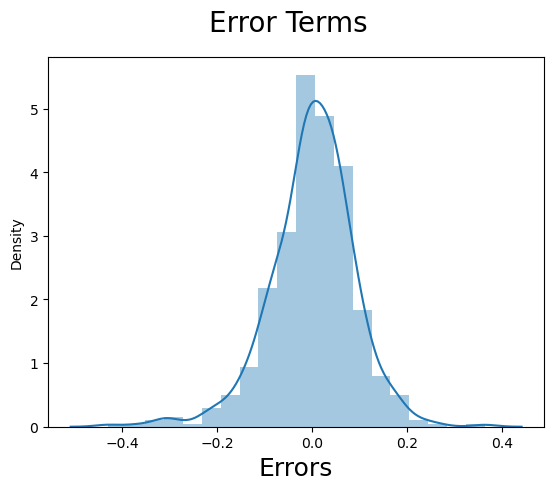

In [70]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

#### We can see that the assumption is satisfied, that is Error terms are normally distributed with mean as 0

In [71]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.67
3,windspeed,4.01
0,year,2.06
9,spring,1.66
8,Misty,1.52
10,winter,1.41
4,july,1.35
5,sep,1.20
6,sun,1.18
7,Light_snowrain,1.08


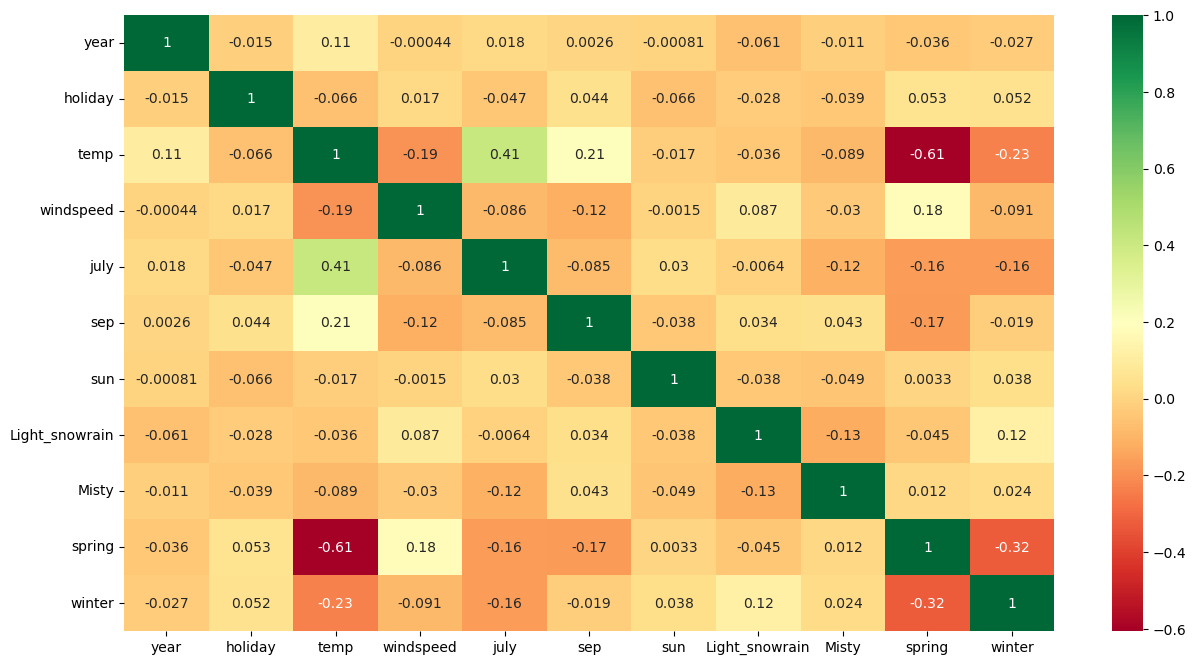

In [72]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

#### All the predictor variables have VIF value less than 5. So we can consider that there is insignificant multicolinearity among the predictor variables.

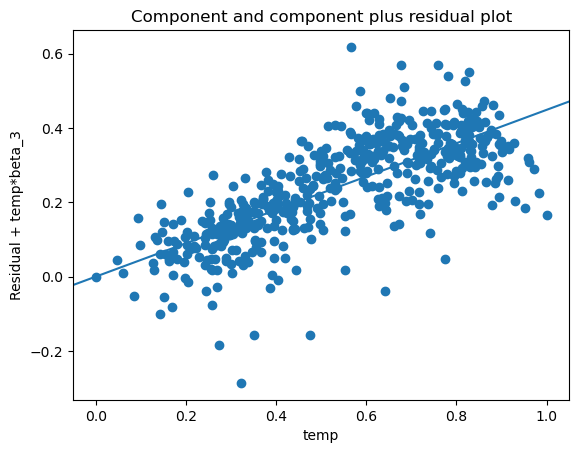

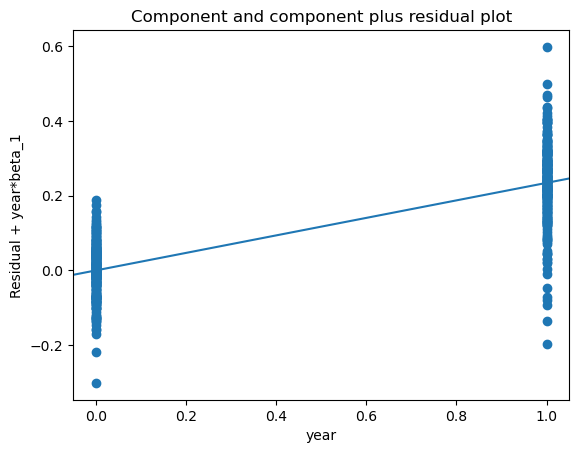

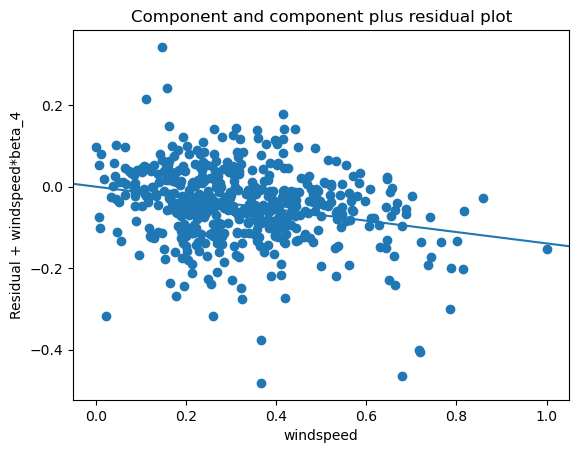

In [73]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_4, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'year')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'windspeed')
plt.show()

#### The above plots represents the relationship between the model and the predictor variables. As we can see, linearity is well preserved

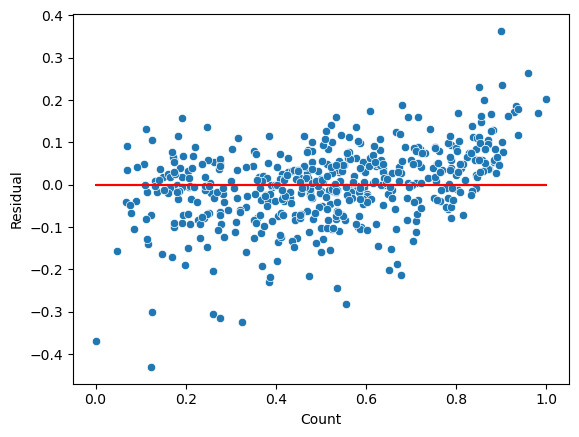

In [74]:
y_train_pred = lr_4.predict(X_train_lm_4)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### There is no visible pattern in residual values, thus homoscedacity is well preserved

Text(0, 0.5, 'y_train_pred')

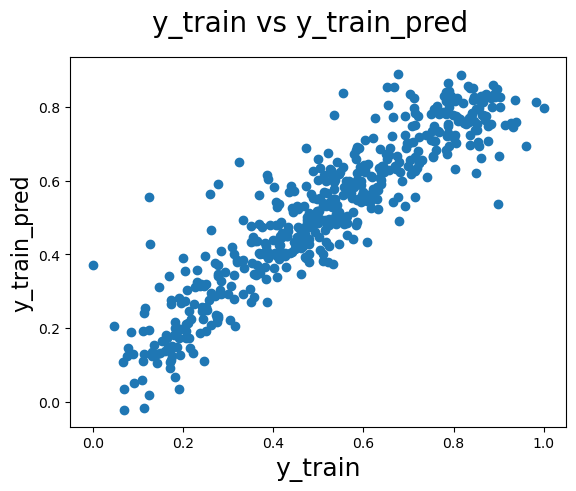

In [75]:
# Plotting y_train and y_train_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize=20)              
plt.xlabel('y_train', fontsize=18)                          
plt.ylabel('y_train_pred', fontsize=16)   

In [76]:
#Calculating the r2 score for the Train set
r2_train = r2_score(y_train,y_train_pred)
print("R^2 for Train Data : ",r2_train)

R^2 for Train Data :  0.8376846976240613


In [77]:
adjusted_r2_train = round(1-(1-r2_train)*(X_train_new.shape[0]-1)/(X_train_new.shape[0]-X_train_new.shape[1]-1),4)
print("Adjusted R^2 for Train Data : ",adjusted_r2_train)

Adjusted R^2 for Train Data :  0.8341


In [78]:
num_vars

['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

## Step-8 : Model Prediction

In [79]:
# Fit on data 
bikes_test[num_vars] = scaler.transform(bikes_test[num_vars])

bikes_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [80]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [81]:
X_test

,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0,1,0,...,0,0,0,1,0,0,0,0,0,1
127,0,0,0,0.584649,0.577380,0.650923,0.069510,0,0,0,...,0,1,0,0,0,0,0,0,1,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0,0,0,...,0,0,0,0,1,0,1,0,0,1
72,0,0,1,0.331557,0.332005,0.512107,0.203418,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [82]:
X_test_new = X_test[X_train_new.columns]
X_test_new

,year,holiday,temp,windspeed,july,sep,sun,Light_snowrain,Misty,spring,winter
184,0,1,0.831783,0.084219,1,0,0,0,1,0,0
535,1,0,0.901354,0.153728,0,0,0,0,0,0,0
299,0,0,0.511964,0.334206,0,0,0,0,1,0,1
221,0,0,0.881625,0.339570,0,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,0.519232,0.283397,0,0,0,0,0,0,1
127,0,0,0.584649,0.069510,0,0,1,0,0,0,0
640,1,0,0.745598,0.052115,0,0,0,0,1,0,1
72,0,0,0.331557,0.203418,0,0,0,0,0,1,0


In [83]:
X_test_new = sm.add_constant(X_test_new)

In [84]:
#Predicting the outcome cnt for the Test set
y_test_pred = lr_4.predict(X_test_new)

In [85]:
#Calculating the r2 score for the Test set
r2_test=r2_score(y_test,y_test_pred)
print("R^2 for Test Data : ",r2_test)

R^2 for Test Data :  0.8104467026544305


## Step-9: Model Evaluation

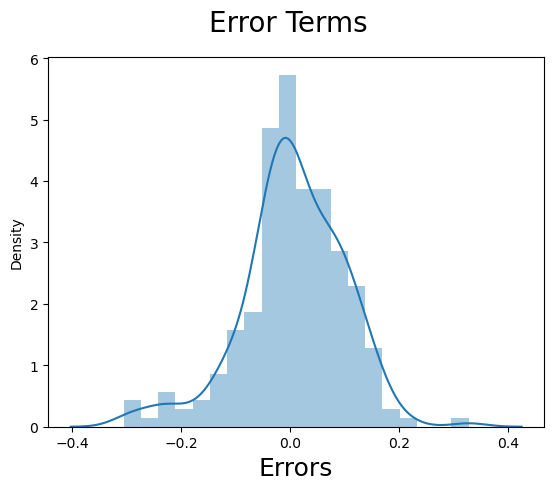

In [86]:
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                        
plt.show()

#### We can see that error terms are normally distributed with mean as 0 for the Test set too

Text(0, 0.5, 'y_pred')

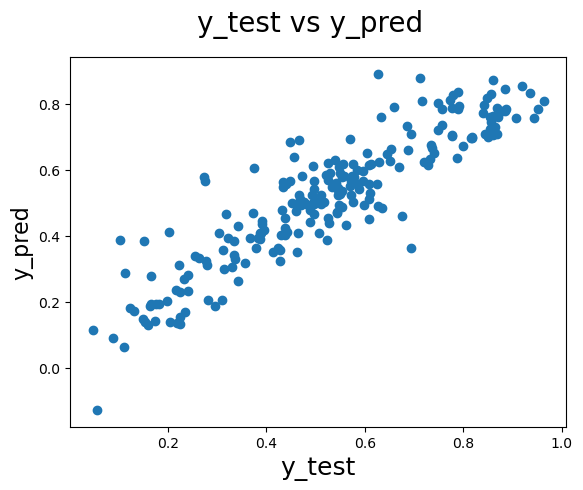

In [87]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)   

Text(0, 0.5, 'y_pred')

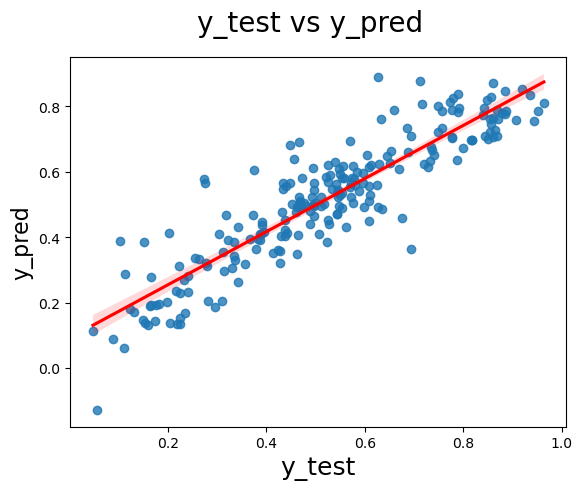

In [88]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(x=y_test,y=y_test_pred, line_kws={"color":'red'})
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)

#### We can see that y_test and y_pred are linearly related


In [89]:
round(lr_4.params,4)

const             0.2608
year              0.2342
holiday          -0.1057
temp              0.4486
windspeed        -0.1393
july             -0.0706
sep               0.0561
sun              -0.0477
Light_snowrain   -0.2907
Misty            -0.0816
spring           -0.1117
winter            0.0471
dtype: float64

In [90]:
round(lr_4.params,4).sort_values()

Light_snowrain   -0.2907
windspeed        -0.1393
spring           -0.1117
holiday          -0.1057
Misty            -0.0816
july             -0.0706
sun              -0.0477
winter            0.0471
sep               0.0561
year              0.2342
const             0.2608
temp              0.4486
dtype: float64

In [91]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2_test = round(1-(1-r2_test)*(X_test_new.shape[0]-1)/(X_test_new.shape[0]-X_test_new.shape[1]-1),4)
print("Adjusted R^2 for Test Data : ",adjusted_r2_test)

Adjusted R^2 for Test Data :  0.7995



#### Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.8377
- Test dataset R^2           : 0.8104
- Train dataset Adjusted R^2 : 0.8341  
- Test dataset Adjusted R^2  : 0.7995


### Conclusion
We can come up with below equation for the best fitting line to Bike Sharing linear model from the above Coefficient

cnt = 0.2608 + 0.2342 * year + -0.1057 * holiday + 0.4486 * temp + -0.1393 * windspeed + -0.0706 * july + 0.0561 * sep + -0.0477 * sun + -0.2907 * Light_snowrain + -0.0816 * Misty + -0.1117 * spring +  0.0471 * winter


### Below are the features which are very significant in predicting the demand for the bikes
1. temp
2. year (yr as per the Data Dictionary)
3. Light_snowrain(weathersit : 3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds as per the Data Dictionary)




In [92]:
RMSE = round(sqrt(mean_squared_error(y_test, y_test_pred)),4)
RMSE

0.0952

In [93]:
MAE = round(mean_absolute_error(y_test, y_test_pred),4)
MAE

0.0715